In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("samsung_price.xlsx")

In [3]:
df.head()

,날짜,종가,전일비,시가,고가,저가,거래량
0,2022.03.23,70500,200,70600,71200,70300,12332242
1,2022.03.22,70300,400,69900,70500,69900,9402666
2,2022.03.21,69900,800,70900,71000,69900,11169002
3,2022.03.18,70700,500,70600,70900,70200,14410038
4,2022.03.17,71200,800,71200,71800,70900,17646315


In [4]:
close = df['종가']
close

0       70500
1       70300
2       69900
3       70700
4       71200
        ...  
6458    68500
6459    68100
6460    66900
6461    67700
6462    67500
Name: 종가, Length: 6463, dtype: int64

In [5]:
close.shift(-1)

0       70300.0
1       69900.0
2       70700.0
3       71200.0
4       70400.0
         ...   
6458    68100.0
6459    66900.0
6460    67700.0
6461    67500.0
6462        NaN
Name: 종가, Length: 6463, dtype: float64

In [17]:
daily_rate = (close / close.shift(-1)-1)* 100
daily_rate

0       0.284495
1       0.572246
2      -1.131542
3      -0.702247
4       1.136364
          ...   
6458    0.587372
6459    1.793722
6460   -1.181684
6461    0.296296
6462         NaN
Name: 종가, Length: 6463, dtype: float64

In [7]:
daily_rate.iloc[-1] = 0

In [8]:
daily_rate.tail()

6458    0.587372
6459    1.793722
6460   -1.181684
6461    0.296296
6462    0.000000
Name: 종가, dtype: float64

In [9]:
df['일간변동률(%)'] = daily_rate

In [10]:
df

,날짜,종가,전일비,시가,고가,저가,거래량,일간변동률(%)
0,2022.03.23,70500,200,70600,71200,70300,12332242,0.284495
1,2022.03.22,70300,400,69900,70500,69900,9402666,0.572246
2,2022.03.21,69900,800,70900,71000,69900,11169002,-1.131542
3,2022.03.18,70700,500,70600,70900,70200,14410038,-0.702247
4,2022.03.17,71200,800,71200,71800,70900,17646315,1.136364
...,...,...,...,...,...,...,...,...
6458,1996.06.29,68500,400,68100,69100,67100,96710,0.587372
6459,1996.06.28,68100,1200,67300,68500,67200,138430,1.793722
6460,1996.06.27,66900,800,67500,67700,66700,155450,-1.181684
6461,1996.06.26,67700,200,67600,67900,66000,136630,0.296296


In [11]:
df_target = df.loc[0:300]
df_target = df_target.loc[::-1]
df_target.reset_index(drop=True, inplace=True)
df_target

,날짜,종가,전일비,시가,고가,저가,거래량,일간변동률(%)
0,2021.01.04,83000,2000,81000,84400,80200,38655276,2.469136
1,2021.01.05,83900,900,81600,83900,81600,35335669,1.084337
2,2021.01.06,82200,1700,83300,84500,82100,42089013,-2.026222
3,2021.01.07,82900,700,82800,84200,82700,32644642,0.851582
4,2021.01.08,88800,5900,83300,90000,83000,59013307,7.117008
...,...,...,...,...,...,...,...,...
296,2022.03.17,71200,800,71200,71800,70900,17646315,1.136364
297,2022.03.18,70700,500,70600,70900,70200,14410038,-0.702247
298,2022.03.21,69900,800,70900,71000,69900,11169002,-1.131542
299,2022.03.22,70300,400,69900,70500,69900,9402666,0.572246


In [12]:
cs = df_target['일간변동률(%)'].cumsum()
cs

0       2.469136
1       3.553473
2       1.527251
3       2.378833
4       9.495841
         ...    
296   -10.200553
297   -10.902800
298   -12.034342
299   -11.462096
300   -11.177601
Name: 일간변동률(%), Length: 301, dtype: float64

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

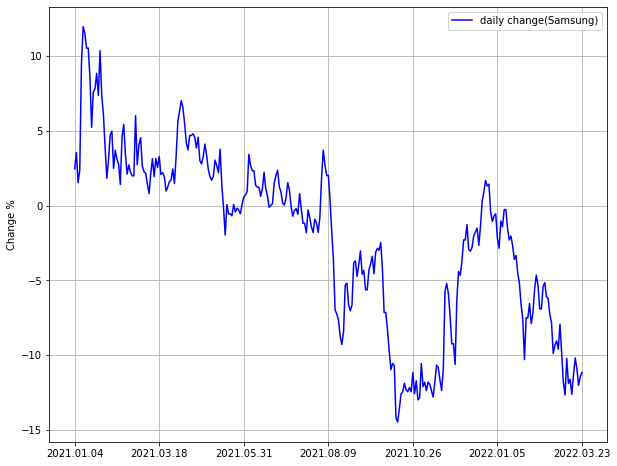

In [14]:
plt.figure(figsize=(10,8))
plt.plot(df_target['날짜'], cs, 'b', label='daily change(Samsung)')
plt.ylabel('Change %')
plt.grid(True)
plt.legend(loc='best')
plt.xticks(range(0, 301, 50))
plt.show()